# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
from PIL import ImagePath
import json

from sklearn.preprocessing import normalize
from tensorflow.keras.utils import to_categorical
from numpy import save

In [2]:
!pip install -U -q segmentation-models
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.7 MB/s eta 0:00:00
Segmentation Models: using `tf.keras` framework.


In [3]:
from segmentation_models.metrics import IOUScore, Precision
from segmentation_models.losses import DiceLoss

# Data Loading

Loading IMG8 dataset

In [ ]:
!wget --header="Host: www.cityscapes-dataset.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.cityscapes-dataset.com/downloads/" --header="Cookie: PHPSESSID=4j3hm6r43ghnfmlcl2c2gn3g7c" --header="Connection: keep-alive" "https://www.cityscapes-dataset.com/file-handling/?packageID=3" -c -O 'leftImg8bit_trainvaltest.zip'

--2023-05-19 12:48:56--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/octet-stream]
Saving to: ‘leftImg8bit_trainvaltest.zip’

leftImg8bit_trainva 100%[===================>]  10.80G  28.2MB/s    in 6m 43s  

2023-05-19 12:55:39 (27.5 MB/s) - ‘leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



In [ ]:
!unzip leftImg8bit_trainvaltest.zip

Streaming output truncated to the last 5000 lines.
 extracting: leftImg8bit/train/jena/jena_000074_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000020_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000030_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000059_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000100_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000034_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000089_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000104_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000080_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000006_000019_leftImg8bit.png  


Loading GTFine dataset

In [ ]:
!wget --header="Host: www.cityscapes-dataset.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.cityscapes-dataset.com/downloads/" --header="Cookie: PHPSESSID=4j3hm6r43ghnfmlcl2c2gn3g7c" --header="Connection: keep-alive" "https://www.cityscapes-dataset.com/file-handling/?packageID=1" -c -O 'gtFine_trainvaltest.zip'

--2023-05-19 12:59:24--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/octet-stream]
Saving to: ‘gtFine_trainvaltest.zip’

gtFine_trainvaltest 100%[===================>] 240.87M  28.2MB/s    in 9.2s    

2023-05-19 12:59:34 (26.1 MB/s) - ‘gtFine_trainvaltest.zip’ saved [252567705/252567705]



In [ ]:
!unzip gtFine_trainvaltest.zip

Streaming output truncated to the last 5000 lines.
  inflating: gtFine/test/berlin/berlin_000117_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000490_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000068_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000288_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000409_00001

Display one of the images from the dataset

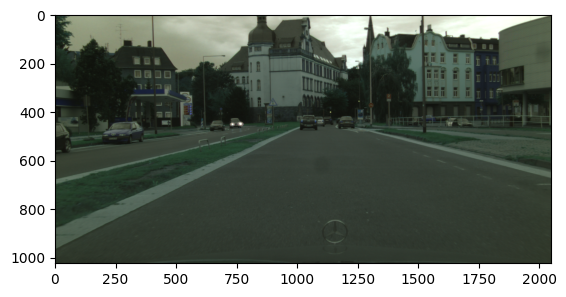

In [ ]:
import cv2
import matplotlib.pyplot as plt

path = "/content/leftImg8bit/train/aachen/aachen_000001_000019_leftImg8bit.png"
img = cv2.imread(path , cv2.IMREAD_COLOR)
plt.imshow(img)

In [ ]:
# This code will find the images path of all the training images and store it in a list
train_images_path = []
path = "/content/leftImg8bit/train/"

for city in os.listdir(path):
    img_count = 0
    f_path = path + str(city)
    
    for file in os.listdir(f_path):

        if img_count < 110:

            file_path = f_path + "/" + str(file)
            
            train_images_path.append(file_path)
            img_count += 1

In [ ]:
len(train_images_path)

1898

In [ ]:
# This code will find the images path of all the validation images and store it in a list
val_images_path = []
path = "/content/leftImg8bit/val/"

for city in os.listdir(path):
    f_path = path + str(city)
    
    for file in os.listdir(f_path):
        file_path = f_path + "/" + str(file)
        val_images_path.append(file_path)

In [ ]:
len(val_images_path)

500

In [ ]:
# This code will find the path of all the training mask correspoding to the images
train_mask_path = []

for tp in train_images_path:

    s1 = tp.split("/")[-1]
    s2 = s1.split("_")
    city = s2[0]
    code = s2[1] + s2[2]

    path = '/content/gtFine/train/'

    for cities in os.listdir(path):

        if cities == city:

            f_path = path + str(city)
            i = 0

            for files in os.listdir(f_path):

                fs1 = files.split("_")
                code1 = fs1[1] + fs1[2]

                if fs1[-1] == "color.png" and code == code1:

                    a = f_path + "/" + str(files)

                    train_mask_path.append(a)

In [ ]:
len(train_mask_path)

1898

In [ ]:
# Storing the training images and training mask in a dataframe
import pandas as pd
import numpy as np

train_path_df = pd.DataFrame()
train_path_df['images'] = train_images_path
train_path_df['mask'] = train_mask_path

In [ ]:
# This code will find the path of all the validation mask correspoding to the images
val_mask_path = []

for tp in val_images_path:

    s1 = tp.split("/")[-1]
    s2 = s1.split("_")
    city = s2[0]
    code = s2[1] + s2[2]

    path = '/content/gtFine/val/'

    for cities in os.listdir(path):

        if cities == city:

            f_path = path + str(city)
            i = 0

            for files in os.listdir(f_path):

                fs1 = files.split("_")
                code1 = fs1[1] + fs1[2]

                if fs1[-1] == "color.png" and code == code1:

                    a = f_path + "/" + str(files)

                    val_mask_path.append(a)

In [ ]:
len(val_mask_path)

500

In [ ]:
# Storing all the validation images and mask in a dataframe
val_path_df = pd.DataFrame()
val_path_df['images'] = val_images_path
val_path_df['mask'] = val_mask_path

In [ ]:
val_path_df.values[428]

array(['/content/leftImg8bit/val/frankfurt/frankfurt_000000_005898_leftImg8bit.png',
       '/content/gtFine/val/frankfurt/frankfurt_000000_005898_gtFine_color.png'],
      dtype=object)

In [ ]:
# Loading and doing preprocessing steps on the images and storing it in a list
def preprocess_images(path):
    output = []

    for i in range(path.shape[0]):
        p = path['images'].iloc[i]
        img = cv2.imread(p , cv2.IMREAD_COLOR)
        img = cv2.resize(img, (256,256), interpolation=cv2.INTER_NEAREST)
        output.append(img)
    
    return output

In [ ]:
# Loading and doing preprocessing steps on the mask and storing it in a list
def preprocess_mask(path):
    output = []

    for i in range(path.shape[0]):
        p = path['mask'].iloc[i]
        img = cv2.imread(p , 0)
        img = cv2.resize(img, (256,256), interpolation=cv2.INTER_NEAREST)
        output.append(img)
    
    return output

In [ ]:
train_images = preprocess_images(path = train_path_df)
val_images = preprocess_images(val_path_df)

In [ ]:
train_mask = preprocess_mask(train_path_df)
val_mask = preprocess_mask(val_path_df)

In [ ]:
# Converting images and mask into numpy array
train_images = np.array(train_images)
train_mask = np.array(train_mask)

val_images = np.array(val_images)
val_mask = np.array(val_mask)

In [ ]:
train_images.shape, val_images.shape

((1898, 256, 256, 3), (500, 256, 256, 3))

In [ ]:
train_mask.shape , val_mask.shape

((1898, 256, 256), (500, 256, 256))

In [ ]:
# Getting all the unique classes in the masked image
def get_class(masks):
    classes = set()

    for i in range(masks.shape[0]):
        img = masks[i]
        array = img.ravel()
        
        uni_val = np.unique(array)

        for val in uni_val:
            classes.add(val)

    return classes

In [ ]:
train_classes = get_class(train_mask)
len(train_classes)

27

In [ ]:
val_classes = get_class(val_mask)
len(val_classes)

26

In [ ]:
print(sorted(train_classes))

[0, 7, 10, 12, 16, 26, 33, 45, 46, 58, 70, 76, 84, 90, 108, 114, 117, 119, 125, 153, 164, 171, 172, 177, 192, 194, 210]


In [ ]:
print(sorted(val_classes))

[0, 7, 10, 12, 16, 26, 33, 45, 46, 58, 70, 76, 84, 90, 108, 114, 117, 119, 153, 164, 171, 172, 177, 192, 194, 210]


In [ ]:
t_i = np.copy(train_images)
t_m = np.copy(train_mask)

v_i = np.copy(val_images)
v_m = np.copy(val_mask)

In [ ]:
# Replacing the class values to a sequence 
values_to_replace = [0, 7, 10, 12, 16, 26, 33, 45, 46, 58, 70, 76, 84, 90, 108, 114, 117, 119, 125, 153, 164, 171, 172, 177, 192, 194, 210]
replacement_values = [i for i in range(27)]

for value, replacement in zip(values_to_replace, replacement_values):
    train_mask[train_mask == value] = replacement
    val_mask[val_mask == value] = replacement

In [ ]:
print(sorted(get_class(train_mask)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [ ]:
print(sorted(get_class(val_mask)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26]


# Preprocessing

### Expanding the dimensions

In [ ]:
# Expanding the dimensions of the training and validation masks
train_mask_ex = np.expand_dims(train_mask, axis=3)

val_mask_ex = np.expand_dims(val_mask, axis=3)

In [ ]:
train_images.shape , train_mask_ex.shape

((1898, 256, 256, 3), (1898, 256, 256, 1))

In [ ]:
val_images.shape, val_mask_ex.shape

((500, 256, 256, 3), (500, 256, 256, 1))

### Normalizing the images

In [ ]:

train_images_norm = normalize(train_images.reshape(train_images.shape[0], -1), axis=1).reshape(train_images.shape)
val_images_norm = normalize(val_images.reshape(val_images.shape[0], -1), axis=1).reshape(val_images.shape)

In [ ]:
train_images_norm.shape , val_images_norm.shape

((1898, 256, 256, 3), (500, 256, 256, 3))

### Taking sample images and saving it for model building

In [ ]:
# Taking only 100 images for training set and 50 images for validation set
final_train_images = train_images_norm[:100,:,:,:]
final_val_images = val_images_norm[:50,:,:,:]

final_train_mask = train_mask_ex[:100,:,:,:]
final_val_mask = val_mask_ex[:50,:,:,:]

In [ ]:
final_train_images.shape, final_train_mask.shape

((100, 256, 256, 3), (100, 256, 256, 1))

In [ ]:
final_val_images.shape, final_val_mask.shape

((50, 256, 256, 3), (50, 256, 256, 1))

In [ ]:
from numpy import save
save('train_images.npy', final_train_images)
save('val_images.npy', final_val_images)

In [ ]:
save('train_mask.npy', final_train_mask)
save('val_mask.npy' , final_val_mask)

# Encoding the labels to one_hot_encoding

In [4]:
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'sem_segmentation')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [5]:
# loading the training images and mask ( saved in the previous stage)
from numpy import load
train_images = load('/content/gdrive/MyDrive/sem_segmentation/train_images.npy')
train_mask = load('/content/gdrive/MyDrive/sem_segmentation/train_mask.npy')

In [6]:
# Encoding the training mask into the respected format
num_classes = 27
y_train = to_categorical(train_mask , num_classes = num_classes)

In [7]:
# loading the validation images and mask ( saved in the previous stage)
val_images = load('/content/gdrive/MyDrive/sem_segmentation/val_images.npy')
val_mask = load('/content/gdrive/MyDrive/sem_segmentation/val_mask.npy')

In [8]:
# Encoding the validation mask into the respected format
y_val = to_categorical(val_mask , num_classes = num_classes)

In [9]:
X_train , X_val = train_images, val_images

In [10]:
X_train.shape, X_val.shape

((100, 256, 256, 3), (50, 256, 256, 3))

In [11]:
y_train.shape, y_val.shape

((100, 256, 256, 27), (50, 256, 256, 27))

# Model Building

In [12]:
# Callback to storing model weights by monitoring validation iou_score
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="model_save/weights-{epoch:02d}-{val_iou_score:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_iou_score',  verbose=1, save_best_only=True, mode='max')

In [13]:
# Defining our U-Net Model --> (loss = dice loss , metrics = iou_score, precision)

model = sm.Unet('resnet34', encoder_weights='imagenet', input_shape = (256,256,3), classes=27, 
                activation='softmax')

iou_score = IOUScore()
precision = Precision()
loss_ftn = DiceLoss()

callback_list = [checkpoint]
                 
model.compile(optimizer='Adam', loss = loss_ftn , metrics=[iou_score, precision])

print(model.summary())

85521592/85521592 [==============================] - 5s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 256, 256, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)            

In [14]:
# Fitting the model with a batch size of 8 and epochs = 400

history=model.fit(X_train, y_train,
          batch_size=8, 
          epochs = 400,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks = callback_list)

Epoch 1/400
13/13 [==============================] - ETA: 0s - loss: 0.9469 - iou_score: 0.0324 - precision: 0.0750
Epoch 1: val_iou_score improved from -inf to 0.00798, saving model to model_save/weights-01-0.0080.hdf5
13/13 [==============================] - 54s 980ms/step - loss: 0.9469 - iou_score: 0.0324 - precision: 0.0750 - val_loss: 0.9840 - val_iou_score: 0.0080 - val_precision: 0.0385
Epoch 2/400
13/13 [==============================] - ETA: 0s - loss: 0.8995 - iou_score: 0.0677 - precision: 0.1159
Epoch 2: val_iou_score improved from 0.00798 to 0.02513, saving model to model_save/weights-02-0.0251.hdf5
13/13 [==============================] - 5s 403ms/step - loss: 0.8995 - iou_score: 0.0677 - precision: 0.1159 - val_loss: 0.9581 - val_iou_score: 0.0251 - val_precision: 0.0523
Epoch 3/400
13/13 [==============================] - ETA: 0s - loss: 0.8727 - iou_score: 0.0930 - precision: 0.1390
Epoch 3: val_iou_score did not improve from 0.02513
13/13 [===========================

# Display Results

## Graphs

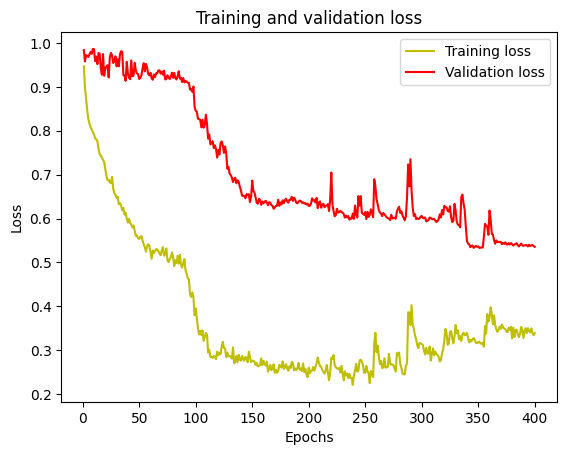

In [15]:
# Showing graph of training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

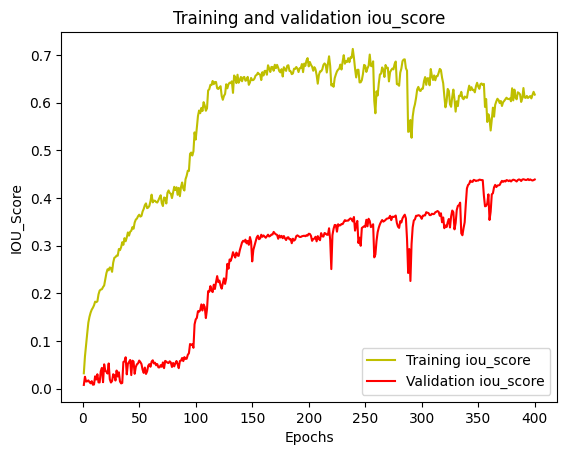

In [17]:
# Showing graph of training and validation iou_score
loss = history.history['iou_score']
val_loss = history.history['val_iou_score']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training iou_score')
plt.plot(epochs, val_loss, 'r', label='Validation iou_score')
plt.title('Training and validation iou_score')
plt.xlabel('Epochs')
plt.ylabel('IOU_Score')
plt.legend()
plt.show()

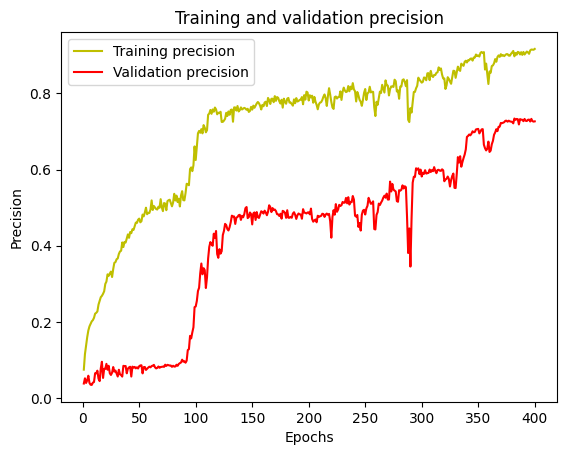

In [18]:
# Showing graph of training and validation precision
loss = history.history['precision']
val_loss = history.history['val_precision']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training precision')
plt.plot(epochs, val_loss, 'r', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

## Display Predicted Results

In [19]:
# Loading the model weights which got the highest "validation iou score"
from tensorflow import keras
final_model = keras.models.load_model('/content/model_save/weights-394-0.4397.hdf5', compile=False)

In [30]:
def plot_results(image, mask):

    img = np.expand_dims( image ,axis = 0) 
    predict = final_model.predict(img)          

    pred_reshape = predict.reshape((256,256,27))

    predicted_class = np.argmax(pred_reshape, axis=-1) 
    original_class = np.argmax(mask, axis = -1)        

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

    ax1.imshow(original_class , cmap='jet')
    ax1.set_title('Original Mask')

    ax2.imshow(predicted_class , cmap='jet')
    ax2.set_title('Predicted Mask')

    plt.show()

1/1 [==============================] - 0s 24ms/step


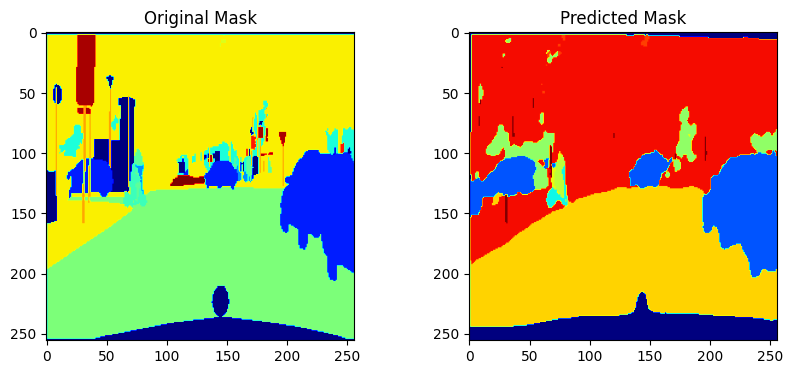

In [31]:
plot_results(image = X_val[0] , mask = y_val[0])

1/1 [==============================] - 0s 24ms/step


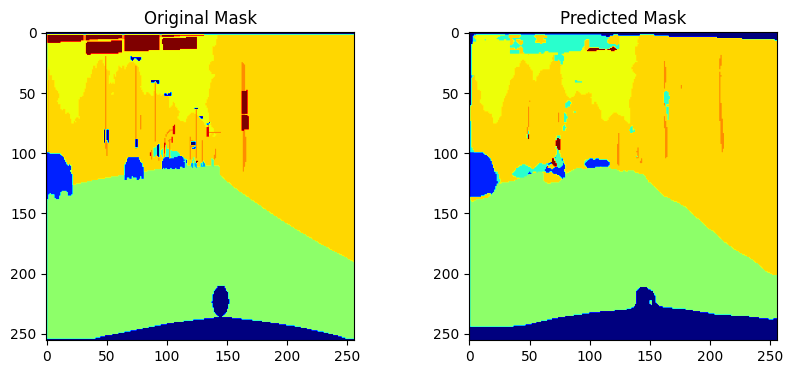

In [32]:
plot_results(image = X_val[24] , mask = y_val[24])

1/1 [==============================] - 0s 23ms/step


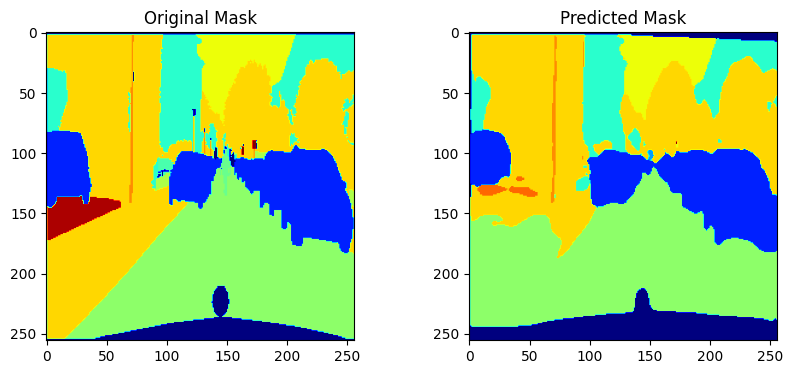

In [33]:
plot_results(image = X_val[42] , mask = y_val[42])